In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Diwali Sales Data.xlsx')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

# Exploratory Data Analysis

## To see how many male and female cusomers are in our dataset

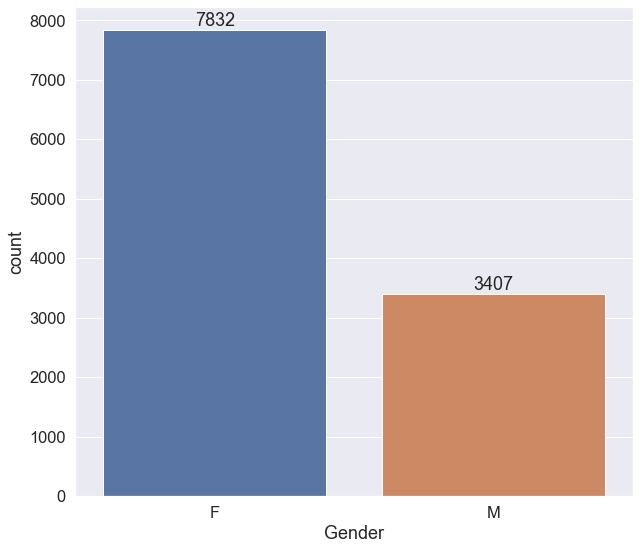

In [31]:
plt.figure(figsize=(10,9))
sns.set(font_scale=1.5)
a = sns.countplot(x='Gender', data=df)

for bars in a.containers:
    a.bar_label(bars)

## Plotting a bar graph to see who spends more money on diwali. Male or Female

<Axes: xlabel='Gender', ylabel='Amount'>

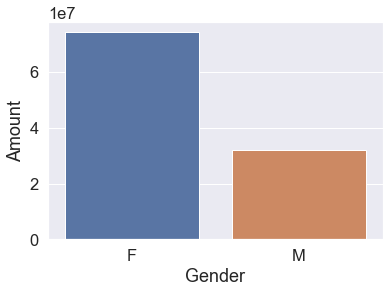

In [38]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

In [39]:
# From above graphs it is clear that most of the purchasing is done by females than males.

## Analysis by Age or Age-group

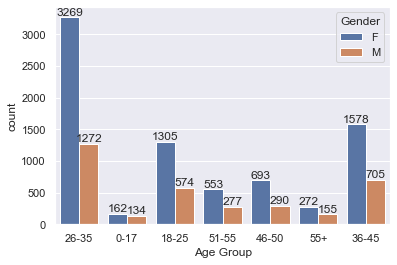

<Figure size 1440x1080 with 0 Axes>

In [45]:
b = sns.countplot(data=df, x='Age Group', hue='Gender')
plt.figure(figsize=(20,15))
sns.set(font_scale=1)

for bars in b.containers:
    b.bar_label(bars)

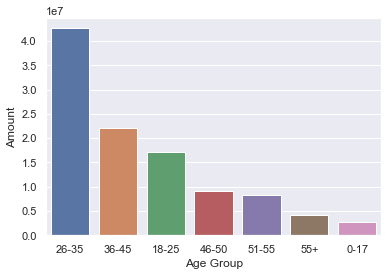

<Figure size 720x360 with 0 Axes>

In [51]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.figure(figsize=(10,5))
plt.show()

In [52]:
# From the above charts we can see that most of the buyers fall under the age group of 26-35.

## Statewise analysis

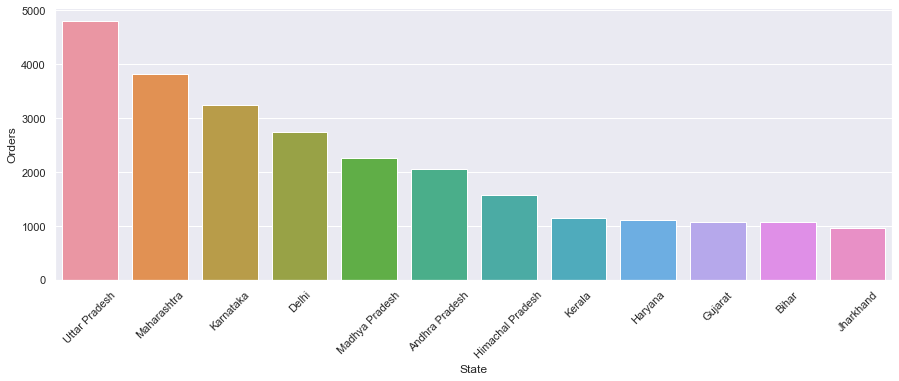

In [57]:
# total no. of orders from different states.(top 12)

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(12)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')
plt.xticks(rotation=45)
plt.show()

In [58]:
# from the graph, most numbers of sales or purchases are from Uttar Pradesh in the first place following Maharashtra and 
# Karnataka.

## Analysis by Marital status

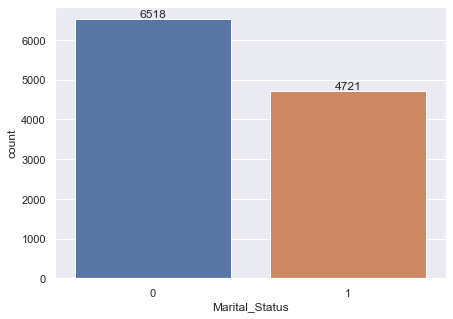

In [60]:
c = sns.countplot(data=df, x='Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in c.containers:
    c.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

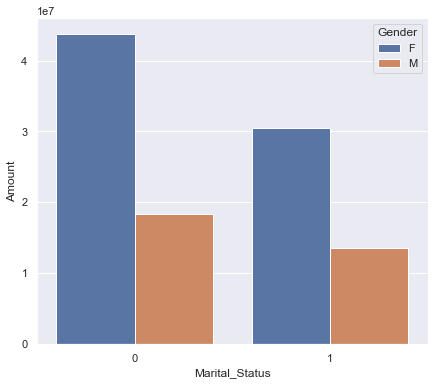

In [62]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(7,6)})
sns.barplot(data = sales_state, x='Marital_Status', y='Amount', hue='Gender')

In [63]:
# From above graphs it is concluded that most of the buyers are married women.

## Analysis by Occupation or Sector

In [64]:
df['Occupation'].value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

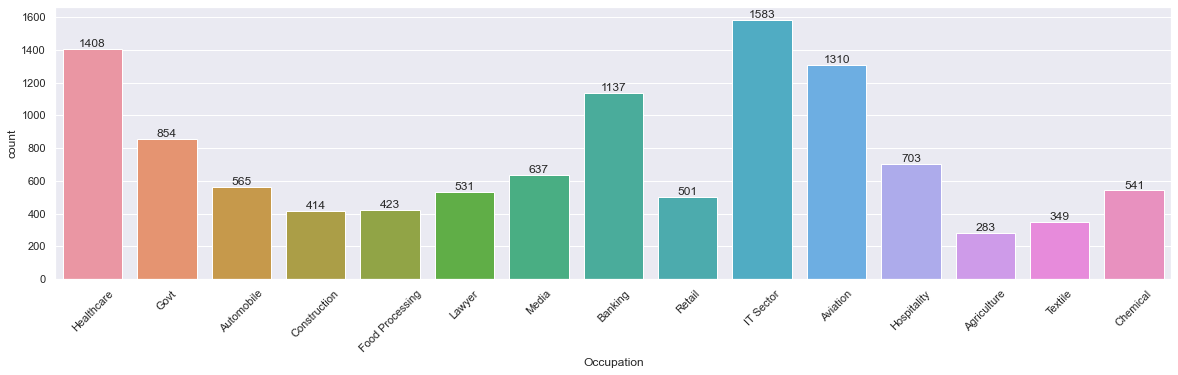

In [66]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=45)
d = sns.countplot(data=df, x='Occupation')

for bars in d.containers:
    d.bar_label(bars)

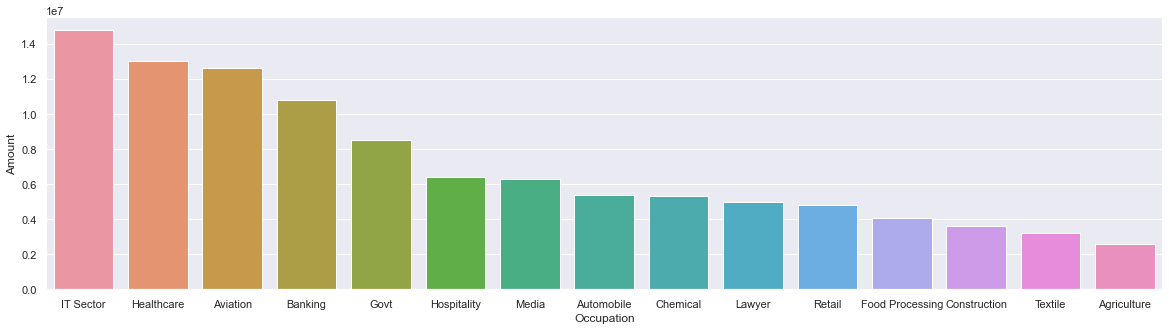

In [68]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x = 'Occupation', y = 'Amount')
plt.show()

In [69]:
# from the chart it is concluded that people working in IT Sector, Healthcare and Aviation are more likely the customers during
# festival

## Analysis by Product category

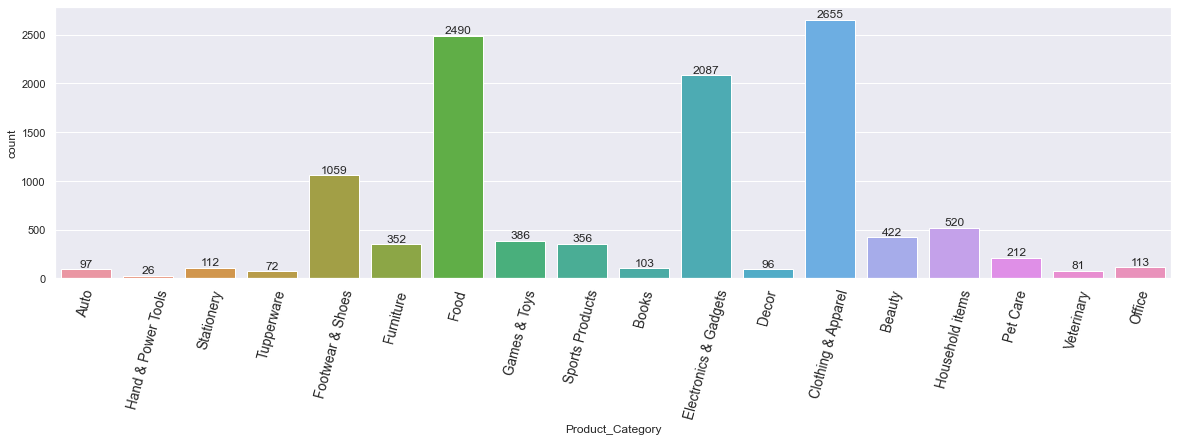

In [78]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=75, fontsize=13.5)
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [79]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

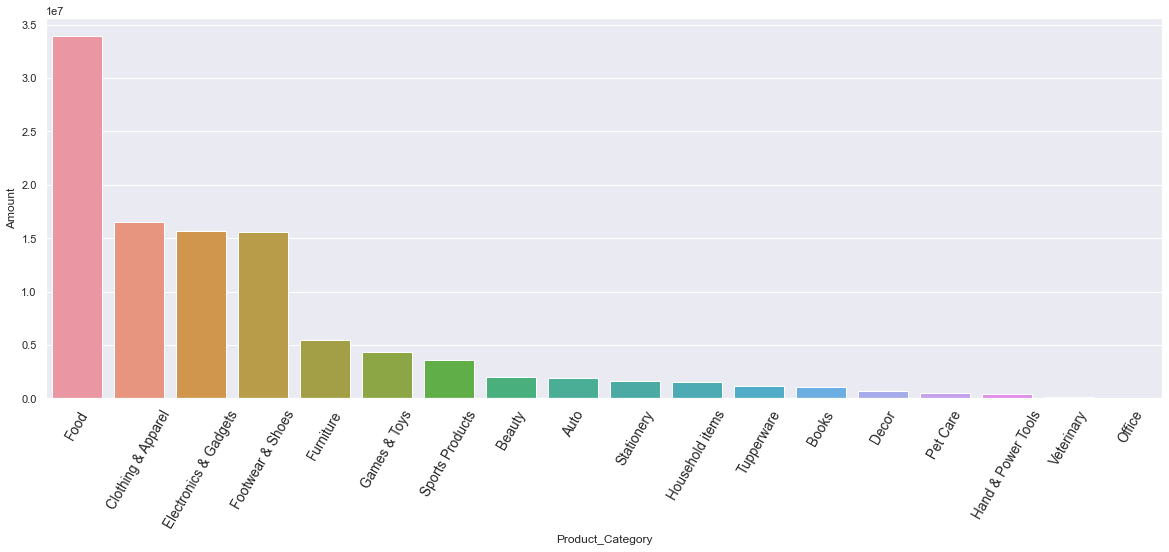

In [82]:
sales_occ = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_occ, x = 'Product_Category', y = 'Amount')
plt.xticks(rotation=60, fontsize=13.5)
plt.show()

In [83]:
# From above charts most of the purchase is occured in Food followed by clothing and apparel & electronics and gadgets.

# Conclusion:

## Married women from age group 26-35 from IT Sector, healthcare and aviation industry are likely to purchase products from Food, Clothing and apparel & electronic gadgets.